# Pengenalan Simple linear regression

simple linear regression yaitu menghubungkan sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

### Persiapan DataSet

In [1]:
import pandas as pd

pizza = {'diameter' : [6, 8, 10, 14, 18],
        'harga' : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


# visualisasi data


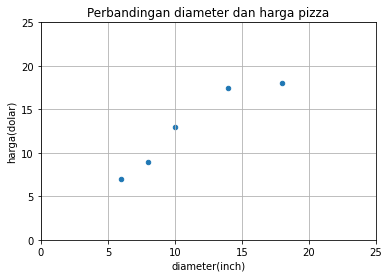

In [3]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x= 'diameter', y='harga')

plt.title('Perbandingan diameter dan harga pizza')
plt.xlabel('diameter(inch)')
plt.ylabel('harga(dolar)')

plt.xlim(0, 25)
plt.ylim(0, 25)

plt.grid(True)
plt.show()

# Simple linear regression model

### penyesuaian DataSet

In [5]:
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x :{x}')
print(f'y :{y}')

x :[ 6  8 10 14 18]
y :[ 7.   9.  13.  17.5 18. ]


In [7]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [8]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

### Training simple linear regression model 

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)


LinearRegression()

### Visualisasi Simple linear regression model

In [31]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

In [36]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

NameError: name 'X' is not defined

### Formula linerar regression 

In [38]:
print(f'intercept:{model.intercept_}')
 
print(f'slope :{model.coef_}')

intercept:1.965517241379315
slope :[0.9762931]


### Mencari Nilai slope

In [39]:
print(f'x:/n{x}/n')
print(f'x flatten: {x.flatten()}/n')
print(f'y: {y}')


x:/n[[ 6]
 [ 8]
 [10]
 [14]
 [18]]/n
x flatten: [ 6  8 10 14 18]/n
y: [ 7.   9.  13.  17.5 18. ]


### Variance

In [41]:
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance: {variance_x}')


variance: 23.2


### Covariance

In [42]:
np.cov(x.flatten(), y)


array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [43]:
covariance_xy = np.cov(x.transpose(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.65


### Slope

In [44]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')


slope: 0.9762931034482758


### Mencari Nilai Intercept

In [46]:
intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intercept}')


intercept: 1.9655172413793114


### Prediksi Harga Pizza

In [47]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [48]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [49]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter: {dmtr} predilsi harga: {hrg}')

diameter: [12] predilsi harga: 13.681034482758621
diameter: [20] predilsi harga: 21.491379310344826
diameter: [23] predilsi harga: 24.42025862068965


# Evaluasi Simple Linear Regression Model

### Training & Testing Dataset

In [50]:
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

x_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])


### Training Simple Linear Regression Model

In [51]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared(R2)

In [53]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')


R-squared: 0.6620052929422553


### Mencari Nilai R-squared

### SSres

In [55]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
             for x_i, y_i in zip(x_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


### SStot

In [56]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


### R2

In [57]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
